## **Abstract** 

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

In this notebook we perform classification on whether a machine would be failed or not based on some factors and patterns.


Acknowledgement : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

Dataset has `10000` entries and `8` feature with `6` nominal and `2` categorical features with `3.39` Target `Failure` observations.

 Numerical features : `Air temperature [K]` `Process temperature [K]` `Rotational speed [rpm]` `Torque [Nm]` `Tool wear [min]` `Target`
 
 Categorical features: `Type` `Failure Type`

In [20]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [21]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [22]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing H2O AutoML 

In [24]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 17 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_wi5st6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.171 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [25]:
from h2o.automl import H2OAutoML

In [26]:
df = h2o.import_file('https://raw.githubusercontent.com/Venkata-Bhargavi/AutoML/main/predictive_maintenance%205.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Dataset is placed in github and importing it as a raw file

## Data Description

`UID`: unique identifier ranging from 1 to 10000

`productID`: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number

`Air temperature [K]`: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
`Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

`Rotational speed [rpm]`: calculated from powepower of 2860 W, overlaid with a normally distributed noise

`Torque [Nm]`: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.

`Tool wear [min]`: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.

`Target` : Failure or Not

`Failure Type` : Type of Failure

Acknowledgements

UCI : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [27]:
df.types # checking the data types of all the features

{'\ufeffUDI': 'int',
 'Product ID': 'string',
 'Type': 'enum',
 'Air temperature [K]': 'real',
 'Process temperature [K]': 'real',
 'Rotational speed [rpm]': 'int',
 'Torque [Nm]': 'real',
 'Tool wear [min]': 'int',
 'Target': 'int',
 'Failure Type': 'enum'}

Here, in this data Target is a categorical feature but represented as integer and should be converted to categorical feature.

In [28]:
df.describe()

Rows:10000
Cols:10

,﻿UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
type,int,string,enum,real,real,int,real,int,int,enum
mins,1.0,NaN,,295.3,305.7,1168.0,3.8,0.0,0.0,
mean,5000.5,NaN,,300.00493,310.00556,1538.7761000000003,39.98690999999997,107.95100000000005,0.033900000000000007,
maxs,10000.0,NaN,,304.5,313.8,2886.0,76.6,253.0,1.0,
sigma,2886.8956799071675,NaN,,2.0002586829158036,1.4837342191657434,179.2840959134266,9.968933725121339,63.654146636636355,0.18098084265065364,
zeros,0,0,,0,0,0,0,120,9661,
missing,0,0,0,0,0,0,0,0,0,0
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,No Failure
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,No Failure
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,No Failure


### Observations from above description

* `Air Temperature` has a mean of 300K and 75% of data is distributed between 295.3K and 301.5K, seems like a good distribution and may not have outliers.
* `Process temperature` has a mean of 310K and maximum data is distributed between 305.7K and 311.1K, looks good and may not have possible outliers.
* `Rotational speed` has a mean 1538 and 75% of data is distribbuted between 1168 and 1612 but the maximum value is 2886 and it looks like investigation is needed to understand outliers and it will be discussed further in this notebook.
* `Torque` has mean 39.9 , maximum value is 76.6, minimum value is 1168 and median is 40.1 which is slightly left skewed from mean.
* `Tool wear` has mean 107.9 and a median(2nd quantile) of 108 which is almost a normal distribution.


All the quantile information 

In [29]:
pdf = pd.read_csv("https://raw.githubusercontent.com/Venkata-Bhargavi/AutoML/main/predictive_maintenance%205.csv")
pdf.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


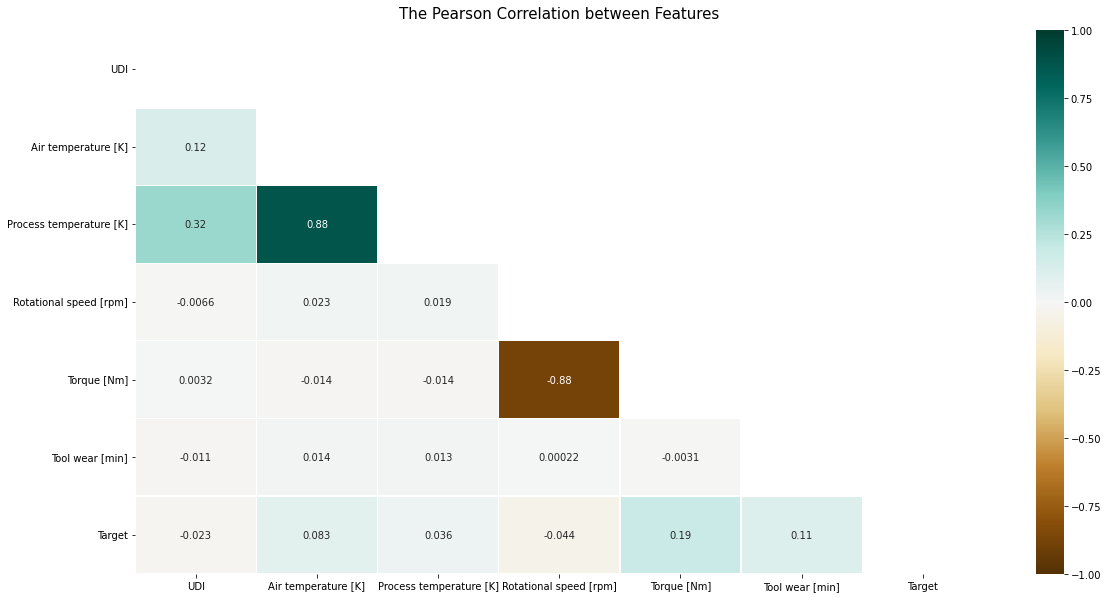

In [30]:
# For Data Visualization
import numpy as np
data_corr = pdf.corr()
mask = np.triu(np.ones_like(pdf.corr(), dtype=bool))
corr_ft = plt.figure(figsize= (19, 10))
corr_ft = sns.heatmap(data_corr, mask=mask,vmin= -1, vmax = 1, annot=True, linewidths= 0.3, cmap= "BrBG")
corr_ft.set_title("The Pearson Correlation between Features",
                   fontsize= 15,
                   pad= 12)
plt.show()

### Observations
- Above heapmap shows that `Air teamperature [k]` and `Process temperature [k]` are highly correlated.
- `Torque` has high correlation comparing to other feature with Target
- `Torque` and `Rotational speed [Nm]` are negatively correlated i.e if Rotational speed increases then Torque decreases and vice versa.
- `Type` has slight correlation with `Rotational speed [Nm]` comparing to other features but it doesn't seem like multi colinearity as the value is very low.


In [31]:
df["Target"] = df["Target"].asfactor()

Converting `Target` column to enum as it is given integer but need to classify it

In [ ]:
train,test,valid = df.split_frame(ratios=[.7, .15])

Splitting train test and vailidation into 70:15:15 ratio.

Here the Target variable is `Process temperature [K]` for regression

In [37]:
y = "Process temperature [K]"
x = df.columns
x.remove(y)
x.remove("Product ID")
x.remove("Failure Type")
x.remove("\ufeffUDI")

- Here the target feature is `Process temperature [K]` for regression.
- Removing `Product ID`, `Failure Type`, `UDI` as product Id and UDI are just unique identifiers and dont contribute for the analysis
- Removing `Failure Type` as it has the failure type information which is similar to target feature and may lead to data leakage

In [38]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


Excluding StackedEnsemble and DeepLearning as it is more complex at this moment and it is also an expensive process

In [39]:
# !nvidia-smi

In [40]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
04:17:11.927: Project: AutoML_1_20221108_41711
04:17:11.928: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:17:11.929: Setting stopping tolerance adaptively based on the training frame: 0.011958266722236254
04:17:11.929: Build control seed: 10
04:17:11.929: training frame: Frame key: AutoML_1_20221108_41711_training_py_3_sid_b71e    cols: 10    rows: 6993  chunks: 8    size: 176478  checksum: 244454059079929206
04:17:11.930: validation frame: Frame key: py_5_sid_b71e    cols: 10    rows: 1504  chunks: 8    size: 55340  checksum: -7065080099492645785
04:17:11.930: leaderboard frame: Frame key: py_5_sid_b71e    cols: 10    rows: 1504  chunks: 8    size: 55340  checksum: -7065080099492645785
04:17:11.930: blending frame: NULL
04:17:11.930: response column: Process temperature [K]
04:17:11.930: fold column: null
04:17:11.931: weights column: null
04:17:11.952: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), g

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,65.0,65.0,53021.0,7.0,7.0,7.0,20.0,102.0,60.23077
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2022-11-08 04:17:25,0.003 sec,0.0,1.4761712,1.2259522,2.1790813,1.5008137,1.2390955,2.2524418
,2022-11-08 04:17:26,0.103 sec,5.0,1.0753478,0.9019722,1.1563729,1.0944453,0.9130067,1.1978104
,2022-11-08 04:17:26,0.184 sec,10.0,0.8442831,0.7122017,0.7128140,0.8625793,0.7226968,0.7440431
,2022-11-08 04:17:26,0.278 sec,15.0,0.7412540,0.6238829,0.5494576,0.7631713,0.6381864,0.5824304
,2022-11-08 04:17:26,0.367 sec,20.0,0.6937811,0.5809065,0.4813322,0.7217702,0.6008077,0.5209522
,2022-11-08 04:17:26,0.450 sec,25.0,0.6593192,0.5485569,0.4347018,0.6944470,0.5744626,0.4822566
,2022-11-08 04:17:26,0.542 sec,30.0,0.6218651,0.5106201,0.3867163,0.6606186,0.5387585,0.4364169
,2022-11-08 04:17:26,0.635 sec,35.0,0.6017933,0.4884780,0.3621551,0.6438452,0.5177867,0.4145366


Training the AutoML with training data 

below, gives the leaderboard which has performance of models after training


In [41]:
lb = aml.leaderboard

In [42]:
best_model = aml.get_best_model()

Storing the best model after training on the dataset

In [43]:
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20221108_41711


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    65                 65                          53021                  7            7            7             20            102           60.2308

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.3188772162640419
RMSE: 0.5646921429097822
MAE: 0.4485160078116621
RMSLE: 0.0018151055950888836
Mean Residual Deviance: 0.3188772162640419

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.4020738457151885
RMSE: 0.6340929314502635
MAE: 0.5001965706748499
RMSLE: 0.002037557509224149
Mean Residual Deviance: 0.4020738457151

In [44]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_2_AutoML_1_20221108_41711,0.634093,0.402074,0.500197,0.00203756,0.402074
GBM_3_AutoML_1_20221108_41711,0.637894,0.406909,0.500367,0.00204975,0.406909
GBM_4_AutoML_1_20221108_41711,0.638443,0.40761,0.499163,0.00205157,0.40761
GBM_1_AutoML_1_20221108_41711,0.639896,0.409467,0.512659,0.00205655,0.409467
XGBoost_3_AutoML_1_20221108_41711,0.645173,0.416249,0.511436,0.00207313,0.416249
XRT_1_AutoML_1_20221108_41711,0.653272,0.426764,0.521691,0.00209945,0.426764
DRF_1_AutoML_1_20221108_41711,0.65341,0.426945,0.510168,0.00209978,0.426945
XGBoost_2_AutoML_1_20221108_41711,0.671826,0.45135,0.521077,0.00215915,0.45135
XGBoost_1_AutoML_1_20221108_41711,0.695483,0.483696,0.543128,0.00223511,0.483696
GLM_1_AutoML_1_20221108_41711,0.720377,0.518943,0.59024,0.00231502,0.518943


Displaying top models in leaderboard

Using best model from leader board to predict on test data

In [45]:
pred=aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [46]:
aml.leader.model_performance(test)  #Checking the best model performance on test data , this is same as using best model above

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.4231708305048506
RMSE: 0.6505158187967842
MAE: 0.5159975791212378
RMSLE: 0.0020907927202465405
Mean Residual Deviance: 0.4231708305048506

MSE: 0.4231708305048506

RMSE: 0.6505158187967842

MAE: 0.5159975791212378

RMSLE: 0.0020907927202465405




MAE and RMSE scores are not highly varying this means that the outliers are less and not effecting the performance. (when squared in RMSE if the outliers are present then it would increase the error to greater extent)

In [48]:
aml.leader.model_performance(valid) # model performance on validation data

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.4020738457151885
RMSE: 0.6340929314502635
MAE: 0.5001965706748499
RMSLE: 0.002037557509224149
Mean Residual Deviance: 0.4020738457151885

In [50]:
perf = aml.leader.model_performance(test)


In [51]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])


In [52]:
model_ids

['GBM_2_AutoML_1_20221108_41711',
 'GBM_3_AutoML_1_20221108_41711',
 'GBM_4_AutoML_1_20221108_41711',
 'GBM_1_AutoML_1_20221108_41711',
 'XGBoost_3_AutoML_1_20221108_41711',
 'XRT_1_AutoML_1_20221108_41711',
 'DRF_1_AutoML_1_20221108_41711',
 'XGBoost_2_AutoML_1_20221108_41711',
 'XGBoost_1_AutoML_1_20221108_41711',
 'GLM_1_AutoML_1_20221108_41711']

In [53]:
# h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [54]:
# out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [55]:
best_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_2_AutoML_1_20221108_41711',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_2_AutoML_1_20221108_41711'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221108_41711_training_py_3_sid_b71e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221108_41711_training_py_3_sid_b71e'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221108_41711_training_py_3_sid_b71e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221108_41711_training_py_3_sid_b71e'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<

In [56]:
# out.convert_H2OXGBoostParams_2_XGBoostParams()

In [57]:
# out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

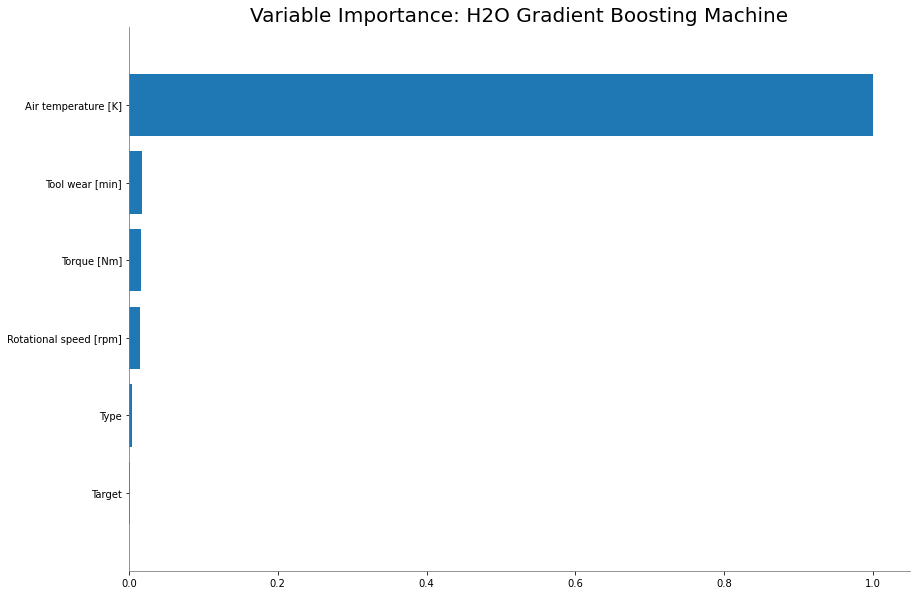

<Figure size 432x288 with 0 Axes>

In [59]:
best_model.varimp_plot()

### Questions and Answers 

1. **Is the relationship significant?**

As mentioned in the Assignment description I didnot perform feature engineering but visualised a pearson correlation heatmap for correlation before one hot encoding
- `Air teamperature [k]` and `Process temperature [k]` are highly correlated.
- `Torque` has high correlation comparing to other feature with Target
- `Torque` and `Rotational speed [Nm]` are negatively correlated i.e if Rotational speed increases then Torque decreases and vice versa.
- `Type` has slight correlation with `Rotational speed [Nm]` comparing to other features but it doesn't seem like multi colinearity as the value is very low.

2. **Are any model assumptions violated?**

As AutoML aims to give best model and tunes hyper parameters for gaining best accuracy. Used H2O.ai to build a maximum of 10 models excluding StackedEnsemble and DeepLearning models with no crossvalidation as validation data is taken from the raw dataset, so automl by default tunes the parameters to get the best model. So, its hard to comment if the AutoML assumptions are violated.

3. **Is there any multicollinearity in the model?**

- `Air teamperature [k]` and `Process temperature [k]` are highly correlated.
- `Torque` and `Rotational speed [Nm]` are negatively correlated i.e if Rotational speed increases then Torque decreases and vice versa.
- `Type` has slight correlation with `Rotational speed [Nm]` comparing to other features but it doesn't seem like multi colinearity as the value is very low.

4. **In the multivariate models are predictor variables independent of all the other predictor variables?**

Few features are independent and some features are dependent on others based on heatmap shown. For examples `Air teamperature [k]` and `Process temperature [k]` are highly colinear.
Moving forward with feature engineering one of this can. be removed but before that , its a best practice to check which has high significance on the model performance through OLS regression. The same can be checked for `Torque` and `Rotational speed [Nm]`

5. **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**

The `varimp_plot()` a H2O.ai function that shows us the most significant predictor variable in a hierarchical manner and `Air teamperature [k]` score of 0.94 is the most significant in this case

6. **Does the model make sense?**

Yes, the model makes sense. The test and validation error scores are significant with train set scores

- The MSE, RMSE, MAE and RMSLE scores are very at par in both the sets and the difference between RMSE and MAE scores is very low which means there is not much effect of outliers.


**Reported on test data.**

MSE: 0.4231708305048506

RMSE: 0.6505158187967842

MAE: 0.5159975791212378

RMSLE: 0.0020907927202465405



**Reported on validation data.**

MSE: 0.4020738457151885

RMSE: 0.6340929314502635

MAE: 0.5001965706748499

RMSLE: 0.002037557509224149


7. **Does regularization help?**

Here model is not overfitted on test or validation data and it may not require regularization in this case.

8. **Which independent variables are significant?**

All the features shows significant importance in prediction. As mentioned in the description of the assignment encoding is not performed on categorical features, doing this would help us get the significant features through permutation importance.

9. **Which hyperparameters are important?**

max_models will let us see the number of models to be trained and display on the dataset , nfolds helps in mentioning the number of parts the dataset to be divided, exclude_algos are important by helping us not considering deep learning models if the data is not too complex, 

### Conclusion :

- The dataset has a categorical target feature that has "Failure" and "not a Failure" classes and predicting "not a Failure" case is more sensitive as it may mislead and not warn the user for potential machinary failures
- `Failure Type` is removed as it has the information about target variable and may lead to data leakage
- H2O AutoML showed good performance in many models and the top one is GBM for classifiation for  our current dataset
- Confusion metrics shows that there is low False negatives which is a good sign by giving high recall
- `Torque [Nm]` shows high importance over other features and the least important feature is shown as `Type` a categorical feature


### Refrences:

1. H2O.ai documentation https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
2. H2O.ai notebook reference on a different dataset for classification https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb#scrollTo=vOxeivTyUCeq
3. H2O.ai model explainability https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
4. Confusion metrics https://en.wikipedia.org/wiki/Confusion_matrix

**All other code and function implementation are independently written.**


Copyright 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.